In [55]:
##############Weltkarte

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import panel as pn
pn.extension()
import param
import numpy as np
import geopandas as gpd
from shapely.geometry import shape

In [57]:
# cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():
    df = pd.read_csv('merged_data_combined_iso3.csv')
    pn.state.cache['data'] = df.copy()
else: 
    df = pn.state.cache['data']

df = df.rename(columns= {"ISO3" : "iso_a3"})
df.head()

,Year,Country,Region,Happiness_Rank,Happiness,Explained_by_Trust,Explained_by_GDP,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual,ISO_Code,Region_Code,Life_Expectancy,Total_Population,iso_a3
0,2023,Finland,Western Europe,1,7.804,0.535,1.888,0.772,0.126,0.535,1.585,2.363,FI,WE,82.5148,5559408.0,FIN
1,2023,Denmark,Western Europe,2,7.586,0.525,1.949,0.734,0.208,0.537,1.548,2.084,DK,WE,82.0326,5928585.0,DNK
2,2023,Iceland,Western Europe,3,7.530,0.187,1.926,0.738,0.250,0.559,1.620,2.250,IS,WE,82.9578,384303.0,ISL
3,2023,Israel,Middle East and Northern Africa,4,7.473,0.158,1.833,0.569,0.124,0.577,1.521,2.691,IL,MENAF,83.3861,9693280.0,ISR
4,2023,Netherlands,Western Europe,5,7.403,0.394,1.942,0.672,0.251,0.545,1.488,2.110,NL,WE,82.5802,17750264.0,NLD


In [58]:
df_grouped = df.groupby('Country')['Happiness'].mean().reset_index()  

In [59]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

C:\Users\laura\AppData\Local\Temp\ipykernel_16804\1460424072.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [60]:
iso_a3_set_df = set(df['iso_a3'])
iso_a3_set_world = set(world['iso_a3'])

In [61]:
missing_in_df = iso_a3_set_world - iso_a3_set_df

if missing_in_df:
    print("ISO_A3-Codes, die in df fehlen (keine Happiness-Werte):", missing_in_df)
else:
    print("Alle ISO_A3-Codes in df sind auch in world vorhanden.")

ISO_A3-Codes, die in df fehlen (keine Happiness-Werte): {'PNG', 'SOL', 'NCL', 'GRL', 'FLK', 'NAM', 'BRN', 'ESH', 'CUB', 'PRK', 'SLB', 'GNQ', 'GNB', 'BHS', 'ATF', 'ERI', 'FJI', '-99', 'CYN', 'VUT', 'GUY', 'ATA', 'TLS'}


In [62]:
missing_in_world = iso_a3_set_df - iso_a3_set_world

if missing_in_world:
    print("ISO_A3-Codes, die in world fehlen (keine Geodaten):", missing_in_world)
else:
    print("Alle ISO_A3-Codes in df2 sind auch in df1 vorhanden.")

ISO_A3-Codes, die in world fehlen (keine Geodaten): {'XKX', 'SGP', 'MUS', 'BHR', nan, 'MDV', 'COM', 'MLT', 'HKG'}


In [63]:
# Die bereitgestellten GeoJSON-Daten für Bahrain
bahrain_geojson = {
    "type": "Feature",
    "properties": {"Country": "Bahrain", "iso_a3": "BHR", "woeid": "23424753"},
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [50.441498315672, 26.079486759594],
                [50.444990826448, 26.155368387131],
                [50.494398435257, 26.240297244012],
                [50.565645056344, 26.252673936522],
                [50.58600454793, 26.247660903832],
                [50.628002395199, 25.943018578555],
                [50.610418895937, 25.857704991003],
                [50.5840692813, 25.815491188858],
                [50.508839915777, 25.868375997347],
                [50.459210656002, 25.954651764437],
                [50.441498315672, 26.079486759594]
            ]
        ]
    }
}

# Erstellen Sie ein GeoDataFrame für Bahrain
bahrain_gdf = gpd.GeoDataFrame([{
    "name": "Bahrain",
    "geometry": shape(bahrain_geojson['geometry']),
    "iso_a3": bahrain_geojson['properties']['iso_a3']
}])

# Fügen Sie Bahrain zu Ihrem vorhandenen GeoDataFrame hinzu
world = gpd.GeoDataFrame(pd.concat([world, bahrain_gdf], ignore_index=True))

C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


In [65]:
bih_geojson = {
    "type": "Feature",
    "properties": {
        "Country": "Bosnia and Herzegovina",
        "iso_a3": "BIH",
        "code": "BIH",
        "group": "Countries"
    },
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [ [ 19.005486, 44.860234 ], [ 19.36803, 44.863 ], [ 19.11761, 44.42307 ], [ 19.59976, 44.03847 ],
            [ 19.454, 43.5681 ], [ 19.21852, 43.52384 ], [ 19.03165, 43.43253 ], [ 18.70648, 43.20011 ],
            [ 18.56, 42.65 ], [ 17.674922, 43.028563 ], [ 17.297373, 43.446341 ], [ 16.916156, 43.667722 ],
            [ 16.456443, 44.04124 ], [ 16.23966, 44.351143 ], [ 15.750026, 44.818712 ], [ 15.959367, 45.233777 ],
            [ 16.318157, 45.004127 ], [ 16.534939, 45.211608 ], [ 17.002146, 45.233777 ], [ 17.861783, 45.06774 ],
            [ 18.553214, 45.08159 ], [ 19.005486, 44.860234 ] ]
        ]
    },
    "_id": "bosnia and herzegovina"
}

bih_gdf = gpd.GeoDataFrame([{
    "name": "Bosnia and Herzegovina",
    "geometry": shape(bih_geojson['geometry']),
    "iso_a3": bih_geojson['properties']['iso_a3']
}])

world = gpd.GeoDataFrame(pd.concat([world, bih_gdf], ignore_index=True))


C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


In [66]:
missing_in_world = iso_a3_set_df - iso_a3_set_world

if missing_in_world:
    print("ISO_A3-Codes, die in world fehlen (keine Geodaten):", missing_in_world)
else:
    print("Alle ISO_A3-Codes in df2 sind auch in df1 vorhanden.")

ISO_A3-Codes, die in world fehlen (keine Geodaten): {'XKX', 'SGP', 'MUS', 'BHR', nan, 'MDV', 'COM', 'MLT', 'HKG'}


In [67]:
world=pd.merge(world,df,left_on=['iso_a3'],right_on=['iso_a3'],how='left')

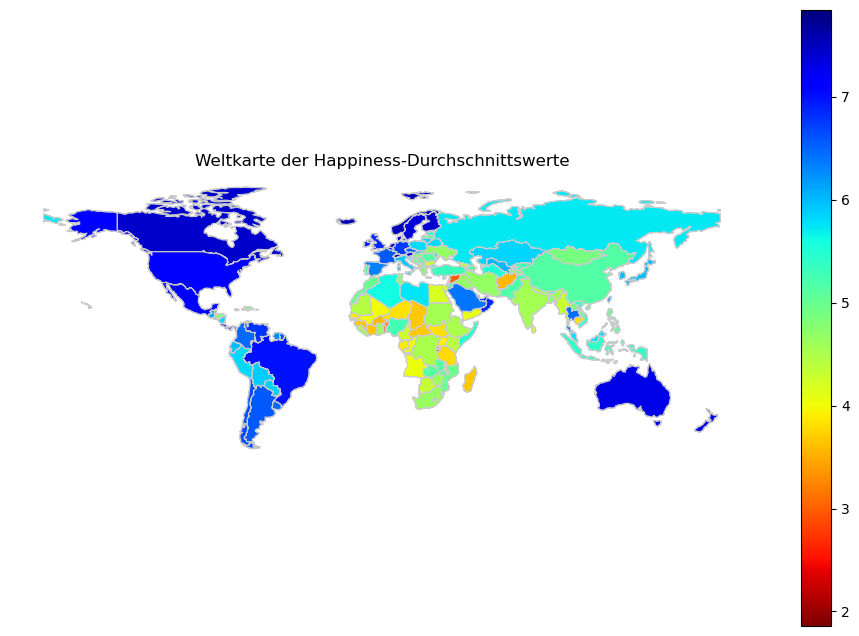

In [74]:
# Definieren Sie Ihre Farbskala (colormap)
cmap = 'jet_r'  # Sie können eine andere Colormap wählen

# Erstellen Sie eine Figure und eine Axis für die Karte
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plotten Sie die Weltkarte und färben Sie die Länder basierend auf den Durchschnittswerten
world.plot(column='Happiness', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

# Legende hinzufügen
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=world['Happiness'].min(), vmax=world['Happiness'].max()))
sm._A = []

cbar = plt.colorbar(sm, ax=ax)
# Titel und Achsenbeschriftungen hinzufügen
plt.title("Weltkarte der Happiness-Durchschnittswerte")
ax.set_axis_off()

# Anzeigen der Weltkarte
plt.show()

In [75]:
world_shapes = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_shapes = world_shapes.set_geometry('geometry')
world_shapes.head()

C:\Users\laura\AppData\Local\Temp\ipykernel_16804\545762351.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_shapes = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [76]:
class WorldMapApp(param.Parameterized):
    year = param.Integer(default=2015, bounds=(2015, 2020))
    
    def __init__(self, world, **params):
        super().__init__(**params)
        self.world_data = df.copy()
    
    def view(self):
        # Filtern Sie die Daten basierend auf dem ausgewählten Jahr
        filtered_data = self.world_data[self.world_data["Year"] == self.year]
        merged = world_shapes.set_index('iso_a3').join(filtered_data.set_index('iso_a3'), lsuffix='_world_shapes', rsuffix='_filtered_data')

        # Erstellen Sie die Figure und die Achse für die Karte
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))

        # Plotten Sie die Weltkarte und färben Sie die Länder basierend auf den Durchschnittswerten
        cmap = 'jet_r'
        merged.plot(column="Happiness", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

        # Legende hinzufügen
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merged["Happiness"].min(), vmax=merged["Happiness"].max()))
        sm._A = []
        cbar = plt.colorbar(sm, ax=ax)

        # Titel und Achsenbeschriftungen hinzufügen
        plt.title(f"Weltkarte der Happiness-Durchschnittswerte ({self.year})")
        ax.set_axis_off()

        # Anzeigen der Weltkarte
        plt.close()
        
        return pn.pane.Matplotlib(fig, width=800, height=500)

In [77]:
# Erstellen Sie die WorldMapApp-Instanz
world_map_app = WorldMapApp(world=world)



In [78]:
year_slider = pn.widgets.IntSlider(name='Year', start=2015, end=2023, step=1, value=2015)

# Erstellen Sie eine Funktion, um die Karte zu aktualisieren
def update_world_map(event):
    year = event.new
    world_map_app.year = year

year_slider.param.watch(update_world_map, 'value')


Watcher(inst=IntSlider(end=2023, name='Year', start=2015, value=2015), cls=<class 'panel.widgets.slider.IntSlider'>, fn=<function update_world_map at 0x00000198511DEB60>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

Column
    [0] IntSlider(end=2023, name='Year', start=2015, value=2015)
    [1] ParamMethod(method, _pane=Matplotlib)
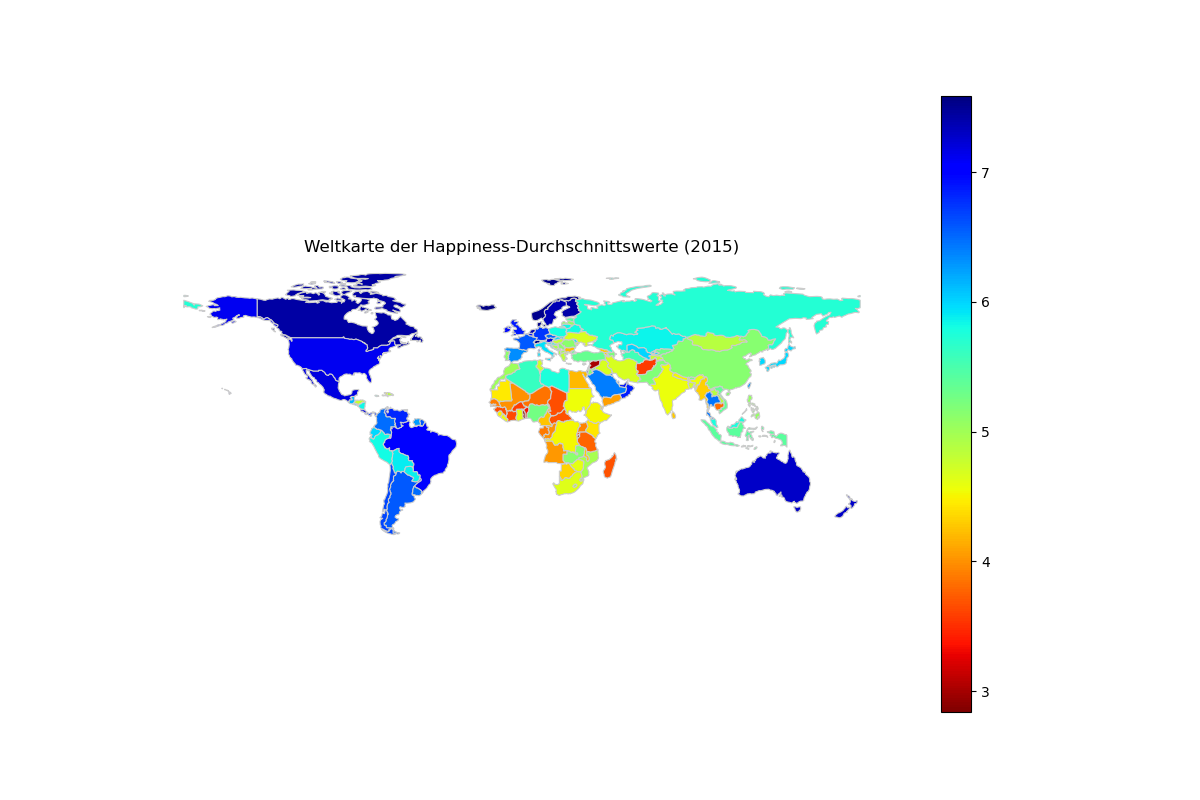

In [79]:
# Verknüpfen Sie den Slider mit der year-Parameter der WorldMapApp
year_slider.param.value = world_map_app.param.year

# Erstellen Sie ein Panel-Element für die Karte
world_map_pane = pn.Column(
    year_slider,
    world_map_app.view
)

# Zeigen Sie die App an
world_map_pane.servable()

In [90]:
class WorldMapApp(param.Parameterized):
    year = param.Integer(default=2015, bounds=(2015, 2020))
    variable = param.ObjectSelector(default="Happiness", objects=["Happiness", "Explained_by_Happiness", "Explained_by_GDP"])

    def __init__(self, world, **params):
        super().__init__(**params)
        self.world_data = df.copy()

    def view(self):
        # Filtern Sie die Daten basierend auf dem ausgewählten Jahr und der ausgewählten Variable
        filtered_data = self.world_data[(self.world_data["Year"] == self.year)]
        merged = world_shapes.set_index('iso_a3').join(filtered_data.set_index('iso_a3'), lsuffix='_world_shapes', rsuffix='_filtered_data')

        # Erstellen Sie die Figure und die Achse für die Karte
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))

        # Plotten Sie die Weltkarte und färben Sie die Länder basierend auf den Durchschnittswerten
        cmap = 'jet_r'
        merged.plot(column=self.variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

        # Legende hinzufügen
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merged[self.variable].min(), vmax=merged[self.variable].max()))
        sm._A = []
        cbar = plt.colorbar(sm, ax=ax)

        # Titel und Achsenbeschriftungen hinzufügen
        plt.title(f"Weltkarte der {self.variable}-Durchschnittswerte ({self.year})")
        ax.set_axis_off()

        # Anzeigen der Weltkarte
        plt.close()

        return pn.pane.Matplotlib(fig, width=800, height=500)


In [92]:
world_map_app = WorldMapApp(world=world)
year_slider = pn.widgets.IntSlider(name='Year', start=2015, end=2023, step=1, value=2015)
variable_selector = pn.widgets.Select(name='Variable', options=["Happiness", "Explained_by_Trust" ,"Explained_by_GDP" , "Explained_by_Freedom" ,"Explained_by_Generosity" ," Explained_by_Health", "Explained_by_Social_support", "Dystopia_Residual", "Life_Expectancy", "Total_Population"], value="Happiness")

In [93]:
# Erstellen Sie eine Funktion, um die Karte zu aktualisieren
def update_world_map(event):
    year = year_slider.value
    world_map_app.year = year

def update_variable(event):
    variable = variable_selector.value
    world_map_app.variable = variable




In [94]:
year_slider.param.watch(update_world_map, 'value')
variable_selector.param.watch(update_variable, 'value')





Watcher(inst=Select(name='Variable', options=['Happiness', ...], value='Happiness'), cls=<class 'panel.widgets.select.Select'>, fn=<function update_variable at 0x000001985549E160>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

Column
    [0] IntSlider(end=2023, name='Year', start=2015, value=2015)
    [1] Select(name='Variable', options=['Happiness', ...], value='Happiness')
    [2] ParamMethod(method, _pane=Matplotlib)
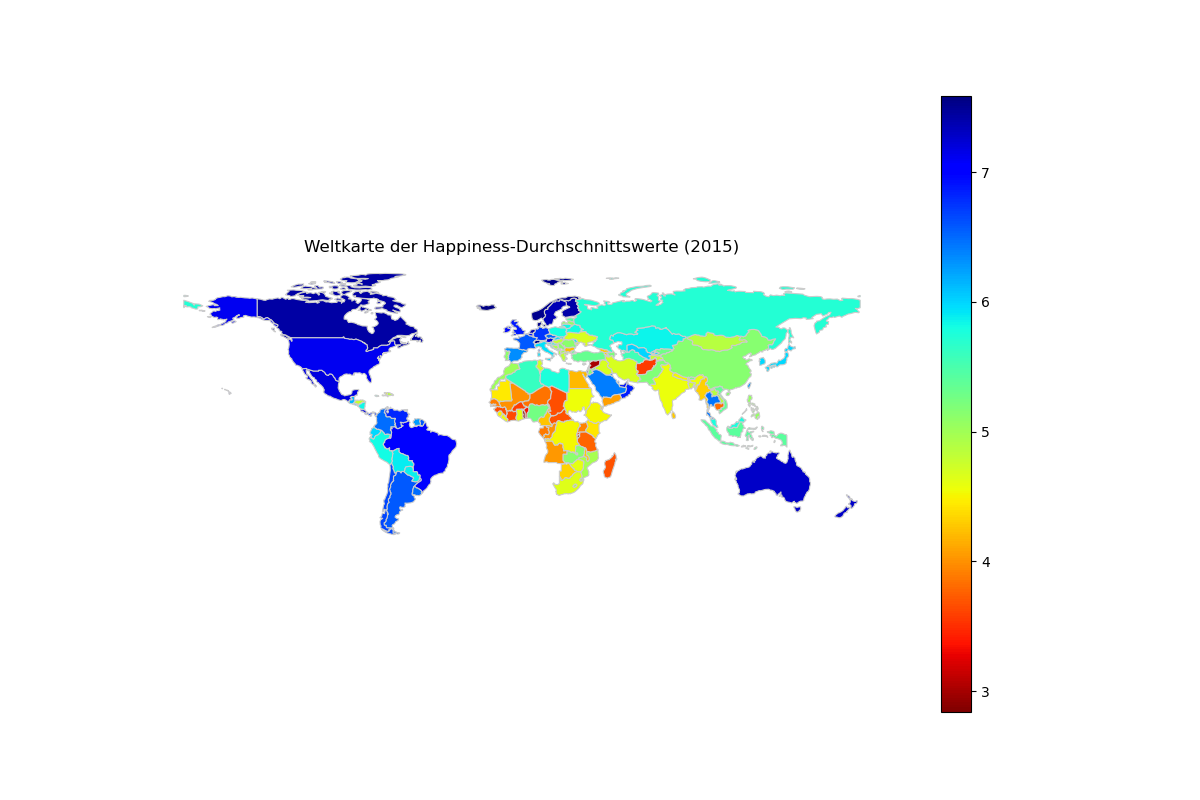

In [95]:
# Verknüpfen Sie den Slider und das Dropdown-Widget mit den entsprechenden Parametern der WorldMapApp
year_slider.param.value = world_map_app.param.year
variable_selector.param.value = world_map_app.param.variable

# Erstellen Sie ein Panel-Element für die Karte
world_map_pane = pn.Column(
    year_slider,
    variable_selector,
    world_map_app.view
)

# Zeigen Sie die App an
world_map_pane.servable()




In [ ]:

# Erstellen Sie ein Panel-Element für die Karte
world_map_pane = pn.Column(
    year_slider,
    variable_selector,
    world_map_app.view
)



In [56]:
# Zeigen Sie die App an
world_map_pane.servable()

Column
    [0] IntSlider(end=2023, name='Year', start=2015, value=2015)
    [1] Select(name='Variable', options=['Happiness', ...], value='Happiness')
    [2] ParamMethod(method, _pane=Matplotlib)
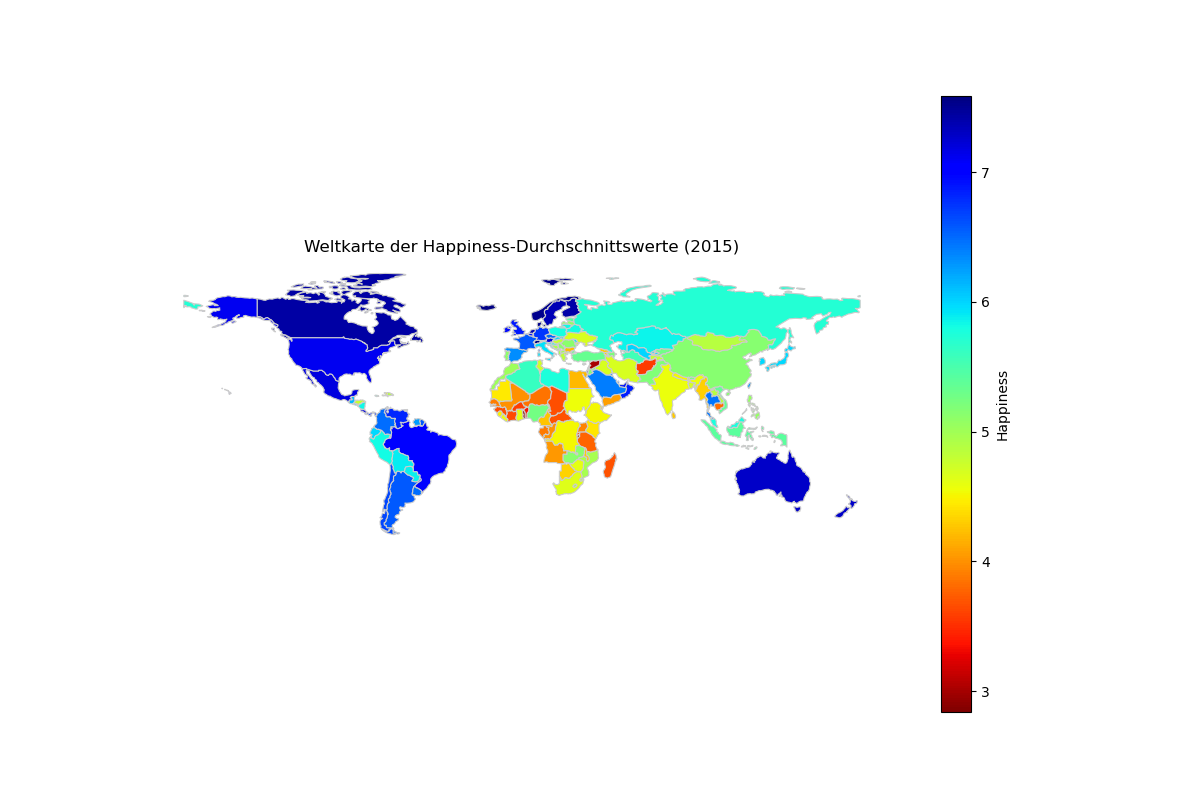

In [99]:
class WorldMapApp(param.Parameterized):
    year = param.Integer(default=2015, bounds=(2015, 2020))
    variable = param.ObjectSelector(default="Happiness", objects=["Happiness", "Explained_by_Trust" ,"Explained_by_GDP" , "Explained_by_Freedom" ,"Explained_by_Generosity" ," Explained_by_Health", "Explained_by_Social_support", "Dystopia_Residual", "Life_Expectancy", "Total_Population"])

    def __init__(self, world, **params):
        super().__init__(**params)
        self.world_data = df.copy()

    def view(self):
        # Filtern Sie die Daten basierend auf dem ausgewählten Jahr und der ausgewählten Variable
        filtered_data = self.world_data[(self.world_data["Year"] == self.year)]
        merged = world_shapes.set_index('iso_a3').join(filtered_data.set_index('iso_a3'), lsuffix='_world_shapes', rsuffix='_filtered_data')

        # Erstellen Sie die Figure und die Achse für die Karte
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))

        # Plotten Sie die Weltkarte und färben Sie die Länder basierend auf den Durchschnittswerten
        cmap = 'jet_r'
        im = merged.plot(column=self.variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

        # Legende hinzufügen und aktualisieren
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merged[self.variable].min(), vmax=merged[self.variable].max()))
        sm._A = []
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label(self.variable)  # Setzen Sie den Labeltext der Legende

        # Titel und Achsenbeschriftungen hinzufügen
        plt.title(f"Weltkarte der {self.variable}-Durchschnittswerte ({self.year})")
        ax.set_axis_off()

        # Anzeigen der Weltkarte
        plt.close()

        return pn.pane.Matplotlib(fig, width=800, height=500)

world_map_app = WorldMapApp(world=world)
year_slider = pn.widgets.IntSlider(name='Year', start=2015, end=2023, step=1, value=2015)
variable_selector = pn.widgets.Select(name='Variable', options=["Happiness", "Explained_by_Trust" ,"Explained_by_GDP" , "Explained_by_Freedom" ,"Explained_by_Generosity" ," Explained_by_Health", "Explained_by_Social_support", "Dystopia_Residual", "Life_Expectancy", "Total_Population"], value="Happiness")

# Erstellen Sie eine Funktion, um die Karte zu aktualisieren
def update_world_map(event):
    year = year_slider.value
    world_map_app.year = year

def update_variable(event):
    variable = variable_selector.value
    world_map_app.variable = variable

year_slider.param.watch(update_world_map, 'value')
variable_selector.param.watch(update_variable, 'value')

# Verknüpfen Sie den Slider und das Dropdown-Widget mit den entsprechenden Parametern der WorldMapApp
year_slider.param.value = world_map_app.param.year
variable_selector.param.value = world_map_app.param.variable

# Erstellen Sie ein Panel-Element für die Karte
world_map_pane = pn.Column(
    year_slider,
    variable_selector,
    world_map_app.view
)

# Zeigen Sie die App an
world_map_pane.servable()

KeyError: 'Country'

pop_est       1
continent     1
name          0
iso_a3        1
gdp_md_est    1
geometry      0
dtype: int64

KeyError: "None of ['Country'] are in the columns"

AssertionError: The field Country is not available in the data. Choose from: ('pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est').

Launching server at http://localhost:53865


interactive(children=(IntSlider(value=2010, description='year', max=2020, min=2010), Output()), _dom_classes=(…

In [70]:
world_map

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [2534181633168] Folium(Map, height=600)
    [2534182178576] Markdown(str)
    [2534181988176] Markdown(str)
    [2534181625872] PNG(str, sizing_mode='scale_both')
    [2534183221776] Markdown(str)
    [2534181410640] IntSlider(end=2020, name='Year', start=2010, value=2010)